# King County Housing Analysis

## Overview

This project analyzes the housing data from houses sold in King County for 2014 and 2015 and creates a model to predict sale price based on various variables.  

## Business Problem: 

A real estate company is interested in current trends affecting housing sales, particularly among middle class homes. The company wants to know how to most effectively price their houses. 


## Data Understanding

This section focuses on exploring the data from King County House Sales for 2014 and 2015.  The data includes a multitude of variables, including data sold, price, bedrooms, bathrooms, square footage of living area, lot, basement, above area, as well as average square foot for neighboring areas, grade, condition, renovation year, views, location, and waterfront.  

The data is extensive, and has various possible predictors available for price.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm

from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation 

I convert the date into datetime format. I also drop an entry that seems to be entered wrong, as it has 33 bedrooms but none of it's other attibutes make that feasible.    

I drop the top 10% most expensive houses in order to focus on middle class and lower homes. This will also help improve reliability of the model as it won't have as many outliers. 

In [6]:
from datetime import datetime
df["date"]=pd.DatetimeIndex(df["date"]).year
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320


In [8]:
df = df.drop([15856])  #dropping entry with 33 bedrooms but only 1.75 baths, 1 floor, and 1620 sqft

In [9]:
#cutting out the top 10% most expensve homes, to focus on more middle class and lower homes.  
df = df[(df['price'] < np.quantile(df['price'], 0.9))]


In [10]:
df=df.drop_duplicates('id')
df = df.drop(['yr_renovated'], axis=1)
df = df.drop(['sqft_basement'], axis=1)

### Null Values
Waterfront and View have null values. I replace the missing values with 0, as it's the mode of each set. 

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2130
view               57
condition           0
grade               0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.926800e+04,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,1.926800e+04,19268.000000,17138.000000,19211.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000,19268.000000
mean,4.619250e+09,2014.318092,450973.118123,3.300291,2.017036,1917.373573,1.420249e+04,1.463073,0.002334,0.147936,3.405335,7.456301,1660.429001,1970.739724,98078.761781,47.553730,-122.213403,1881.096793,12228.335894
std,2.877850e+09,0.465748,177634.836437,0.875036,0.688563,721.411269,3.867682e+04,0.536007,0.048256,0.587727,0.644307,0.967747,679.760108,29.006717,53.290667,0.143059,0.143001,574.108831,25712.490700
min,1.000102e+06,2014.000000,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.143701e+09,2014.000000,310000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,1951.000000,98033.000000,47.452200,-122.331000,1460.000000,5020.750000
50%,3.922150e+09,2014.000000,425000.000000,3.000000,2.000000,1820.000000,7.480000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1480.000000,1974.000000,98065.000000,47.562800,-122.235000,1770.000000,7500.000000
75%,7.345383e+09,2015.000000,572000.000000,4.000000,2.500000,2360.000000,1.016000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2030.250000,1996.000000,98118.000000,47.680600,-122.123000,2220.250000,9752.000000
max,9.900000e+09,2015.000000,886000.000000,11.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5450.000000,2015.000000,98199.000000,47.777600,-121.315000,4670.000000,560617.000000


In [13]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking Data Type
I plot histograms of the data. I change zipcode and waterfront into string in order to treat them as a categorical value. I also create a column for age of the house when it was sold. 

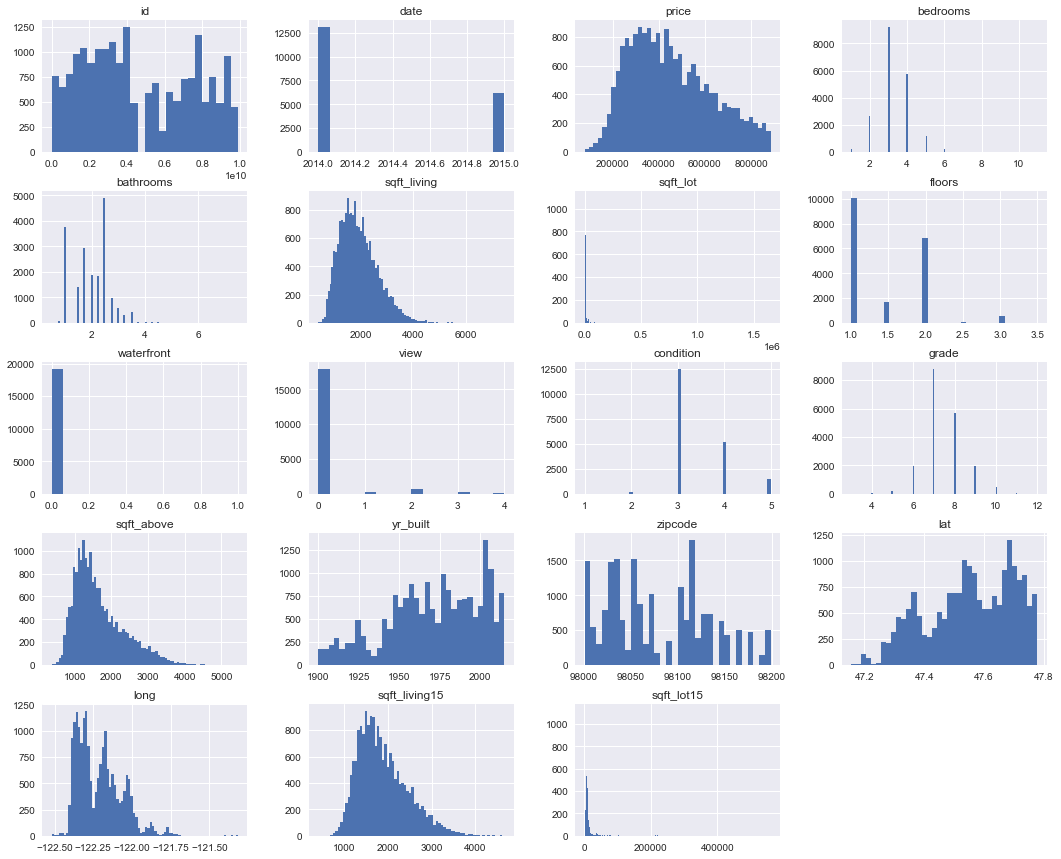

In [14]:
df.hist(figsize=(18,15), bins='auto');


In [15]:

df['zipcode']=df['zipcode'].astype('str')
df['waterfront'] = df['waterfront'].astype('str')


In [16]:
df['age']=df['date']-df['yr_built']


In [17]:
df2 = df  #create a copy of the dataframe with these basic changes for use with future models

### Linearity

I check the linearity assumption for the chosen features against the target variable (price) using scatter plots. 

Most variables show at least a bit of a linear relationship. 

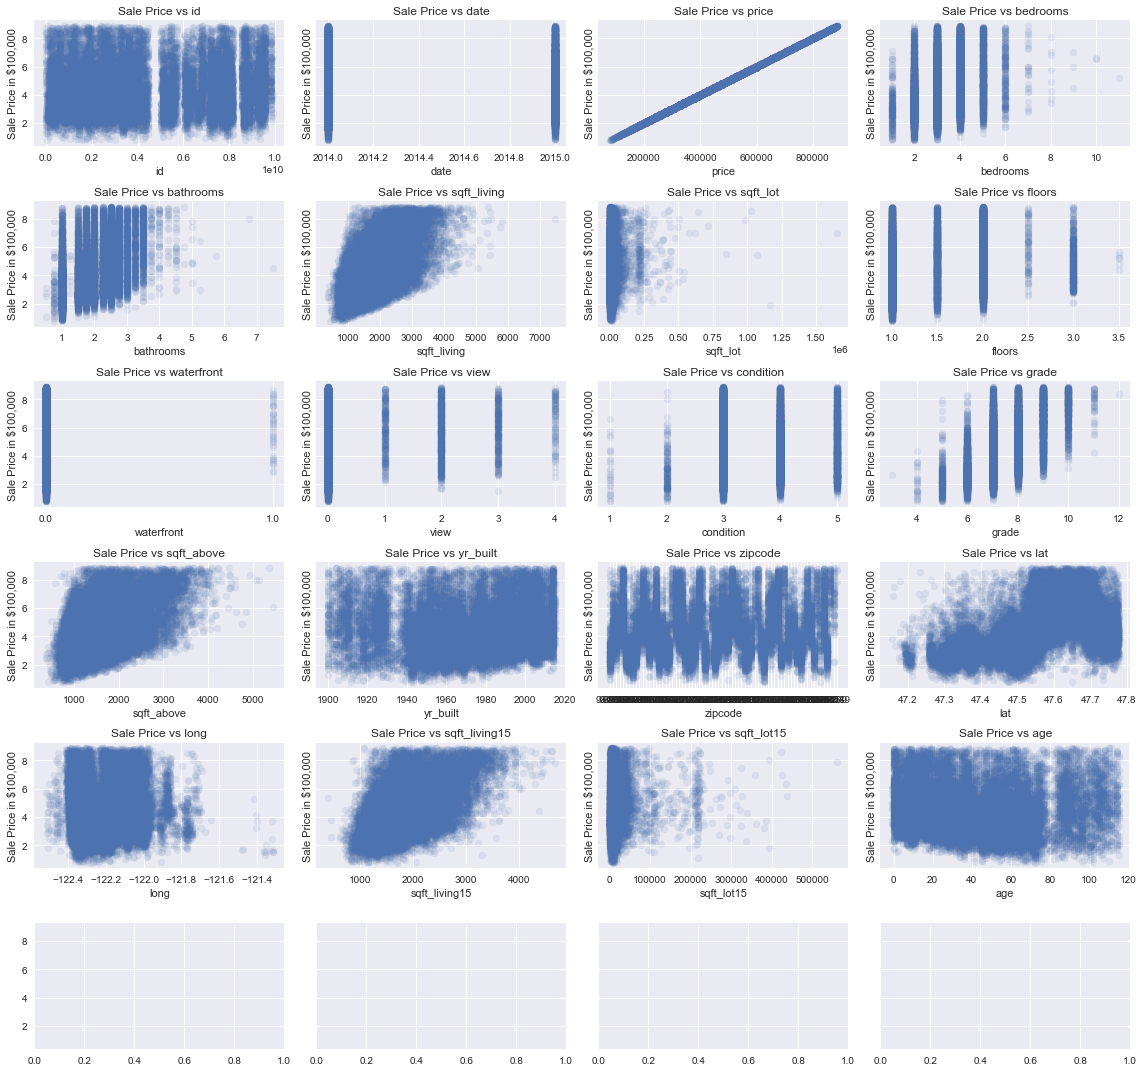

In [18]:

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()



### Correality 

I check correleation between the values, and delete one of those among pairs that are highly correlated (r > .71).  I drop the values of sqft_living15, sqft_lot15, and sqft_above for this reason.  I also drop the values of year built, id, and date sold as not necessary for the model. 

In [19]:
feats = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']
corr = df[feats].corr()
corr

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,age
date,1.000000,-0.008467,-0.026569,-0.028574,0.001448,-0.018540,-0.044848,-0.031974,-0.022155,0.006643,-0.031885,0.001009,-0.023395,-0.005394,0.009413
bedrooms,-0.008467,1.000000,0.496690,0.607491,0.021976,0.149961,0.021609,0.311227,0.476542,0.168254,-0.050827,0.146821,0.375237,0.019880,-0.168386
bathrooms,-0.026569,0.496690,1.000000,0.700786,0.050712,0.500301,-0.142266,0.593226,0.620501,0.559953,-0.033199,0.250691,0.510566,0.051441,-0.560367
sqft_living,-0.028574,0.607491,0.700786,1.000000,0.147125,0.323775,-0.075283,0.669570,0.841104,0.357810,-0.025196,0.290545,0.719971,0.162711,-0.358261
sqft_lot,0.001448,0.021976,0.050712,0.147125,1.000000,-0.025669,0.002117,0.076264,0.150674,0.032992,-0.101723,0.219824,0.142228,0.707947,-0.032968
floors,-0.018540,0.149961,0.500301,0.323775,-0.025669,1.000000,-0.282782,0.451579,0.523247,0.522012,0.024433,0.135469,0.258131,-0.030281,-0.522299
condition,-0.044848,0.021609,-0.142266,-0.075283,0.002117,-0.282782,1.000000,-0.181772,-0.181658,-0.351687,-0.019692,-0.094514,-0.128795,0.007329,0.350959
grade,-0.031974,0.311227,0.593226,0.669570,0.076264,0.451579,-0.181772,1.000000,0.677186,0.509437,0.058166,0.229514,0.642185,0.088913,-0.509939
sqft_above,-0.022155,0.476542,0.620501,0.841104,0.150674,0.523247,-0.181658,0.677186,1.000000,0.467581,-0.081755,0.395406,0.699862,0.167550,-0.467927
yr_built,0.006643,0.168254,0.559953,0.357810,0.032992,0.522012,-0.351687,0.509437,0.467581,1.000000,-0.162147,0.403134,0.371167,0.053791,-0.999871


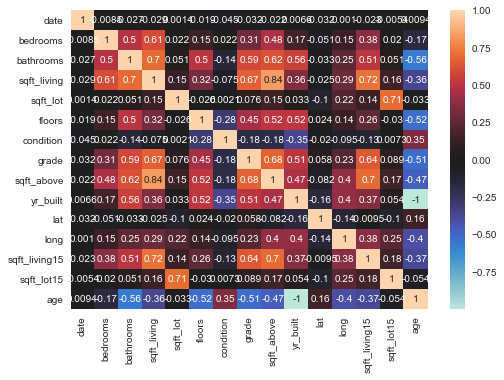

In [20]:
sns.heatmap(corr, center=0, annot=True);

In [21]:

df = df.drop(['sqft_living15'], axis=1)
df = df.drop(['sqft_lot15'], axis=1)
df = df.drop(['sqft_above'], axis=1)
df = df.drop(['yr_built'], axis=1)
df = df.drop(['id'], axis=1)
df = df.drop(['date'], axis=1)

In [22]:
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'zipcode', 'lat', 'long', 'age']
corr = df[feats].corr()

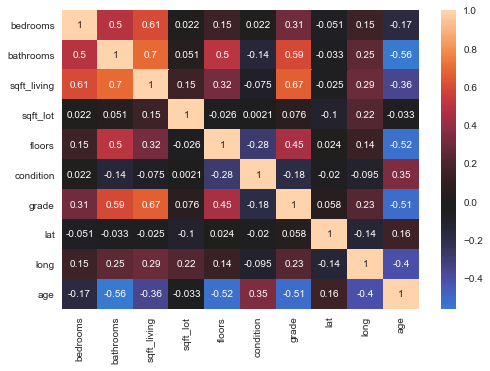

In [23]:
sns.heatmap(corr, center=0, annot=True);

### Normalizing the Data

I plot histograms to check normality of the data, as having more normally distributed data will be helpful for the model. I then apply the logarithmic function to sqft_living and sqft_lot to make the distrubitution appear more normal. I then scale the data so that it has similar magnitudes. 
    


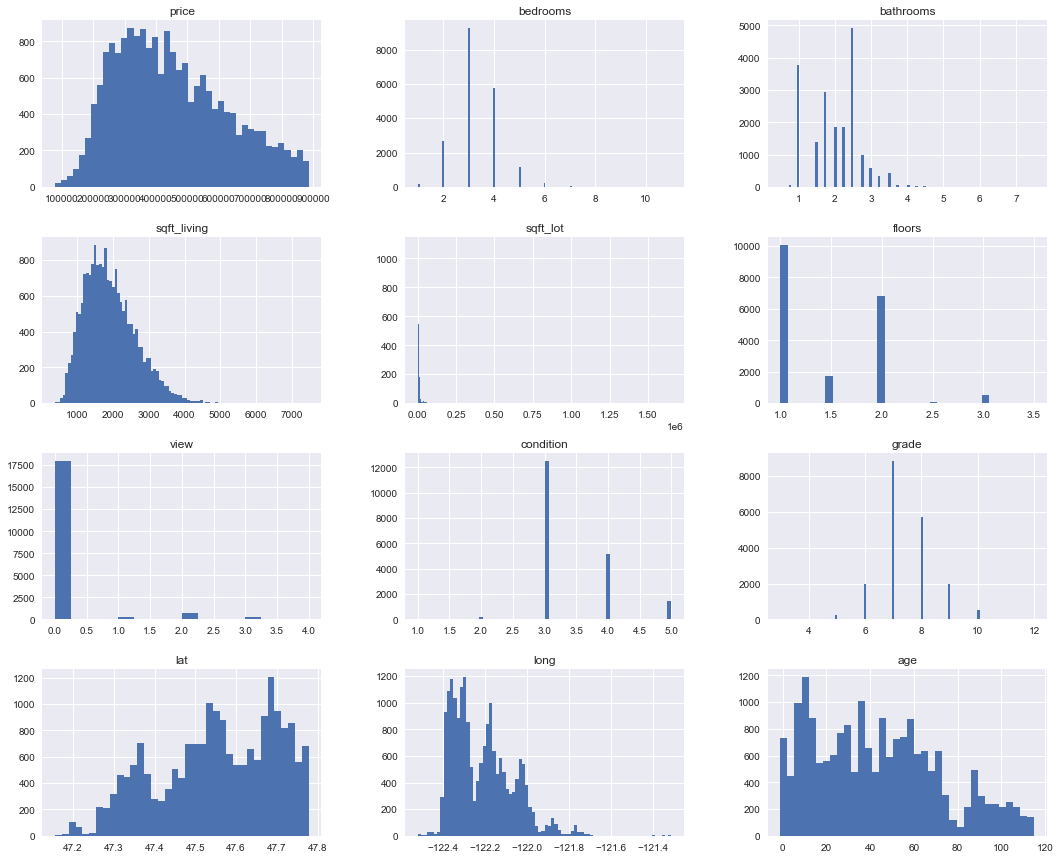

In [24]:
df.hist(figsize=(18,15), bins='auto');



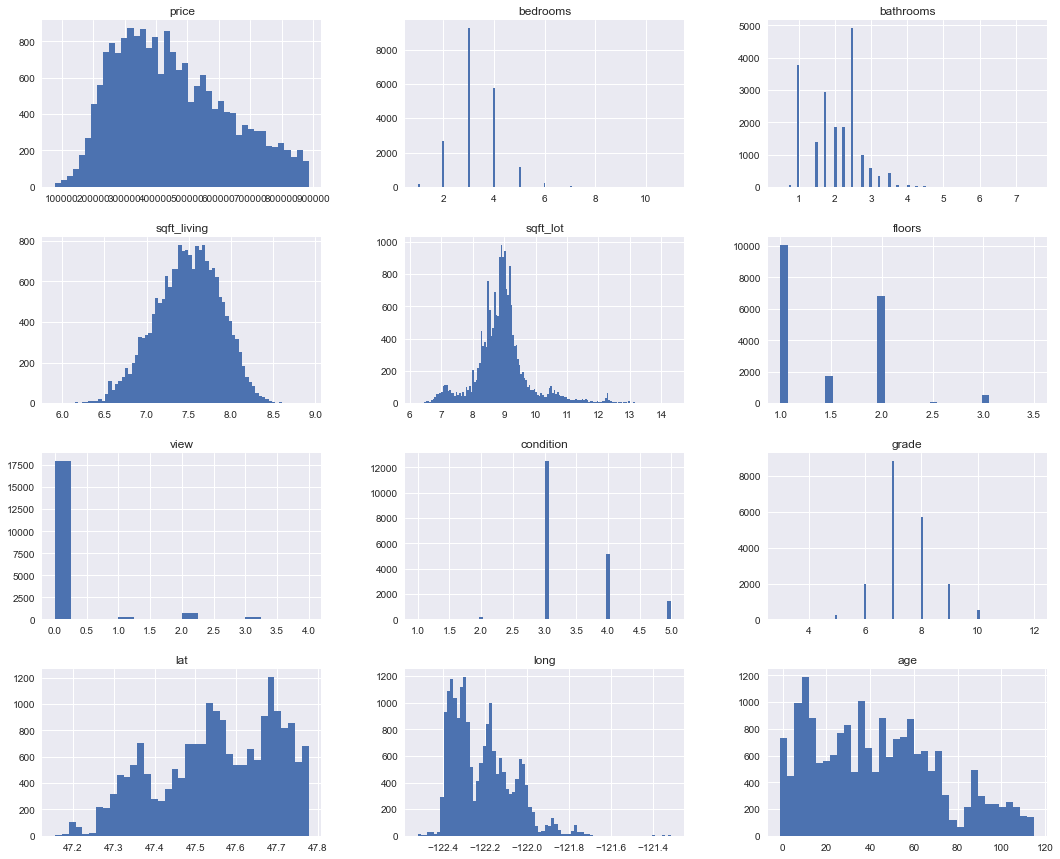

In [25]:
non_normal = ['sqft_living', 'sqft_lot']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
    
df.hist(figsize=(18,15), bins='auto');


In [26]:

def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
             'condition', 'grade', 'age', 'lat', 'long']:
    df[feat] = norm_feat(df[feat])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,lat,long,age
count,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04,1.926800e+04
mean,2.712809e-16,-1.128316e-16,4.755163e-15,2.317597e-13,3.148935e-15,-2.718244e-14,-3.433377e-15,-9.166220e-15,-4.433459e-16,-5.906113e-13,-1.298057e-12,8.307082e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.099662e+00,-2.628795e+00,-2.203192e+00,-4.096970e+00,-3.022548e+00,-8.639318e-01,-2.513129e-01,-3.733215e+00,-4.604820e+00,-2.780884e+00,-2.137022e+00,-1.536795e+00
25%,-7.936119e-01,-3.431751e-01,-7.508916e-01,-6.702956e-01,-4.810613e-01,-8.639318e-01,-2.513129e-01,-6.291030e-01,-4.715082e-01,-7.097085e-01,-8.223485e-01,-8.473148e-01
50%,-1.462164e-01,-3.431751e-01,-2.474142e-02,5.014542e-02,-2.877095e-02,-8.639318e-01,-2.513129e-01,-6.291030e-01,-4.715082e-01,6.339996e-02,-1.510259e-01,-1.233607e-01
75%,6.813240e-01,7.996347e-01,7.014088e-01,7.265199e-01,3.150837e-01,1.001715e+00,-2.513129e-01,9.229529e-01,5.618198e-01,8.868374e-01,6.321838e-01,6.695415e-01
max,2.448995e+00,8.799304e+00,7.962911e+00,3.729486e+00,6.031549e+00,3.800186e+00,6.564025e+00,2.475009e+00,4.695132e+00,1.564880e+00,6.282482e+00,2.462190e+00


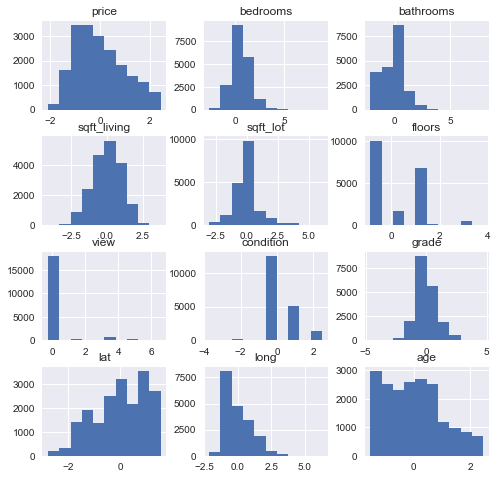

In [27]:
df.hist(figsize = [8,8]);


### Categorical features
I use one-hot encoding to handle the categorical features. 

In [28]:
#create dummy variables for the categorical features

categoricals = ['zipcode', 'waterfront']
dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=True)
df_preprocessed = df.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,lat,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0
0,-1.289573,-0.343175,-1.477042,-1.077875,-0.343826,-0.863932,-0.251313,-0.629103,-0.471508,-0.297291,...,0,0,0,0,0,1,0,0,0,0
1,0.489920,-0.343175,0.338334,0.948427,-0.065080,1.001715,-0.251313,-0.629103,-0.471508,1.169239,...,0,0,0,0,0,0,0,0,0,0
2,-1.525450,-1.485985,-1.477042,-2.189123,0.297260,-0.863932,-0.251313,-0.629103,-1.504836,1.287372,...,0,0,0,0,0,0,0,0,0,0
3,0.861469,0.799635,1.427559,0.243063,-0.481061,-0.863932,-0.251313,2.475009,-0.471508,-0.230186,...,0,0,0,0,0,0,0,0,0,0
4,0.332293,-0.343175,-0.024741,-0.158221,0.057869,-0.863932,-0.251313,-0.629103,0.561820,0.440867,...,0,0,0,0,0,0,0,0,0,0


## Modeling: 

I create a model to predict data. I then go through and remove paramaters with p-values over 0.05

In [29]:
import statsmodels.api as sm
predictors = df_preprocessed.drop('price', axis=1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_preprocessed['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1012.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:57:31   Log-Likelihood:                -11322.
No. Observations:               19268   AIC:                         2.281e+04
Df Residuals:                   19186   BIC:                         2.345e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6674      0.051    -13.052      0.000      -0.768      -0.567
bedrooms          -0.0286      0.004     -6.686      0.000      -0.037      -0.020
bathrooms          0.0429      0.005      7.935      0.000       0.032       0.054
sqft_living        0.3559      0.006     56.682      0.000       0.344       0.368
sqft_lot           0.1408      0.005     29.829      0.000       0.132       0.150
floors             0.0392      0.004      8.809      0.000       0.030       0.048
view               0.0890      0.003     25.770      0.000       0.082       0.096
condition          0.0636      0.004     18.051      0.000       0.057       0.071
grade              0.2653      0.005     52.153      0.000       0.255       0.275
lat                0.1643      0.026      6.311      0.000       0.113       0.215
long              -0.0572      0.018     -3.098      0.002      -0.093      -0.021
age                0.0734      0.005     13.499      0.000       0.063       0.084
zipcode_98002      0.0884      0.040      2.230      0.026       0.011       0.166
zipcode_98003     -0.0408      0.035     -1.151      0.250      -0.110       0.029
zipcode_98004      2.2655      0.076     29.801      0.000       2.117       2.415
zipcode_98005      1.5290      0.073     21.036      0.000       1.387       1.671
zipcode_98006      1.2357      0.060     20.765      0.000       1.119       1.352
zipcode_98007      1.1075      0.074     14.994      0.000       0.963       1.252
zipcode_98008      1.0793      0.070     15.404      0.000       0.942       1.217
zipcode_98010      0.5948      0.061      9.720      0.000       0.475       0.715
zipcode_98011      0.4143      0.091      4.558      0.000       0.236       0.592
zipcode_98014      0.3491      0.100      3.507      0.000       0.154       0.544
zipcode_98019      0.2250      0.098      2.291      0.022       0.033       0.418
zipcode_98022      0.2531      0.053      4.742      0.000       0.148       0.358
zipcode_98023     -0.1232      0.033     -3.770      0.000      -0.187      -0.059
zipcode_98024      0.6550      0.088      7.413      0.000       0.482       0.828
zipcode_98027      0.9730      0.059     16.398      0.000       0.857       1.089
zipcode_98028      0.2856      0.089      3.226      0.001       0.112       0.459
zipcode_98029      1.1848      0.068     17.366      0.000       1.051       1.319
zipcode_98030      0.0165      0.039      0.422      0.673      -0.060       0.093
zipcode_98031      0.0026      0.041      0.062      0.950      -0.077       0.083
zipcode_98032     -0.1226      0.047     -2.600      0.009      -0.215      -0.030
zipcode_98033      1.3235      0.077     17.133      0.000       1.172       1.475
zipcode_98034      0.5898      0.082      7.218      0.000       0.430       0.750
zipcode_9803

In [30]:
#make a list of the columns with pvalues less than 0.05
result2 = []
for column in predictors_int:
    if model.pvalues[column]<0.05:
        result2.append(column)
result2.remove('const')


In [31]:
#Build the final model again in Statsmodel
X = df_preprocessed.drop(['price'], axis=1)
X_fin = X[result2]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(df_preprocessed['price'], X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1138.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:57:32   Log-Likelihood:                -11328.
No. Observations:               19268   AIC:                         2.280e+04
Df Residuals:                   19195   BIC:                         2.338e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6084      0.021    -29.399      0.000      -0.649      -0.568
bedrooms          -0.0285      0.004     -6.664      0.000      -0.037      -0.020
bathrooms          0.0429      0.005      7.940      0.000       0.032       0.053
sqft_living        0.3560      0.006     56.718      0.000       0.344       0.368
sqft_lot           0.1403      0.005     29.839      0.000       0.131       0.149
floors             0.0395      0.004      8.876      0.000       0.031       0.048
view               0.0896      0.003     26.079      0.000       0.083       0.096
condition          0.0634      0.004     18.017      0.000       0.057       0.070
grade              0.2650      0.005     52.213      0.000       0.255       0.275
lat                0.1968      0.015     13.243      0.000       0.168       0.226
long              -0.0507      0.014     -3.503      0.000      -0.079      -0.022
age                0.0741      0.005     13.677      0.000       0.064       0.085
zipcode_98002      0.0851      0.034      2.538      0.011       0.019       0.151
zipcode_98004      2.1927      0.053     41.729      0.000       2.090       2.296
zipcode_98005      1.4570      0.048     30.058      0.000       1.362       1.552
zipcode_98006      1.1731      0.035     33.998      0.000       1.105       1.241
zipcode_98007      1.0331      0.049     21.124      0.000       0.937       1.129
zipcode_98008      1.0021      0.041     24.350      0.000       0.921       1.083
zipcode_98010      0.5773      0.052     11.169      0.000       0.476       0.679
zipcode_98011      0.3093      0.052      6.000      0.000       0.208       0.410
zipcode_98014      0.2474      0.068      3.628      0.000       0.114       0.381
zipcode_98019      0.1132      0.061      1.864      0.062      -0.006       0.232
zipcode_98022      0.2624      0.042      6.281      0.000       0.181       0.344
zipcode_98023     -0.1192      0.026     -4.565      0.000      -0.170      -0.068
zipcode_98024      0.5821      0.068      8.577      0.000       0.449       0.715
zipcode_98027      0.9147      0.037     24.997      0.000       0.843       0.986
zipcode_98028      0.1825      0.048      3.829      0.000       0.089       0.276
zipcode_98029      1.1154      0.043     25.957      0.000       1.031       1.200
zipcode_98032     -0.1375      0.040     -3.397      0.001      -0.217      -0.058
zipcode_98033      1.2341      0.042     29.376      0.000       1.152       1.316
zipcode_98034      0.4925      0.042     11.747      0.000       0.410       0.575
zipcode_98038      0.3001      0.030     10.066      0.000       0.242       0.359
zipcode_98039      2.9359      0.254     11.580      0.000       2.439       3.433
zipcode_98040      1.9132      0.049     39.038      0.000       1.817       2.009
zipcode_9804

### Regression Model Validation, train-test tsplit 

I take a sample of the data to "train" the model by fitting a linear regression to it.  I then compare the predictive answers to the actual values.  This model has a train mean squared error of .198 and test mean squarred error of 0.188, which do not have a huge difference between them.  The mean squared error tells how close a regression line is to a set of points. I then perform cross-validation, and get a MSE of .194

In [32]:
from sklearn.model_selection import train_test_split
y = df_preprocessed[['price']]
X = df_preprocessed.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [34]:
#Look at the residuals and calculate the MSE for training and test sets:  
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.190487293428229
Test Mean Squarred Error: 0.18759088784594197


In [35]:
#cross-validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()


0.1938885746316464

### Feature Ranking Model
I use feature ranking with recursive feature elimination to try another model, but reject it as it has a much lower R2. 

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg2 = LinearRegression()
selector = RFE(linreg2)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True])

In [37]:
#Fit the linear regression model again using the selected columns

selected_columns = X.columns[selector.support_ ]
linreg2.fit(X[selected_columns],y)

LinearRegression()

In [38]:
yhat2 = linreg2.predict(X[selected_columns])


In [39]:
SS_Residual = np.sum((y-yhat2)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [40]:
r_squared

price    0.686297
dtype: float64

In [41]:
#Build the final model again in Statsmodel
X2 = df_preprocessed.drop(['price'], axis=1)
X_fin2 = X2[selected_columns]
X_with_intercept2 = sm.add_constant(X_fin2)
model2 = sm.OLS(df_preprocessed['price'], X_with_intercept2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1052.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:57:39   Log-Likelihood:                -16171.
No. Observations:               19268   AIC:                         3.242e+04
Df Residuals:                   19227   BIC:                         3.275e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5328      0.006    -94.080      0.000      -0.544      -0.522
sqft_living        0.5584      0.004    130.416      0.000       0.550       0.567
zipcode_98004      2.2240      0.058     38.072      0.000       2.110       2.339
zipcode_98005      1.5542      0.052     30.148      0.000       1.453       1.655
zipcode_98006      1.2212      0.032     38.346      0.000       1.159       1.284
zipcode_98007      1.0428      0.051     20.494      0.000       0.943       1.143
zipcode_98008      0.9899      0.036     27.884      0.000       0.920       1.060
zipcode_98010      0.2231      0.057      3.899      0.000       0.111       0.335
zipcode_98024      0.5762      0.068      8.506      0.000       0.443       0.709
zipcode_98027      0.8101      0.030     27.305      0.000       0.752       0.868
zipcode_98029      0.9975      0.033     30.263      0.000       0.933       1.062
zipcode_98033      1.3453      0.032     41.849      0.000       1.282       1.408
zipcode_98039      3.0553      0.324      9.437      0.000       2.421       3.690
zipcode_98040      1.9877      0.057     35.080      0.000       1.877       2.099
zipcode_98045      0.2814      0.039      7.212      0.000       0.205       0.358
zipcode_98052      1.1317      0.025     44.764      0.000       1.082       1.181
zipcode_98053      1.0568      0.031     34.073      0.000       0.996       1.118
zipcode_98065      0.4387      0.033     13.159      0.000       0.373       0.504
zipcode_98070      0.4928      0.055      8.955      0.000       0.385       0.601
zipcode_98074      1.0665      0.029     36.169      0.000       1.009       1.124
zipcode_98075      1.2749      0.034     37.105      0.000       1.208       1.342
zipcode_98077      0.9548      0.044     21.691      0.000       0.869       1.041
zipcode_98102      1.7296      0.067     25.710      0.000       1.598       1.862
zipcode_98103      1.3484      0.024     55.172      0.000       1.301       1.396
zipcode_98105      1.5823      0.046     34.738      0.000       1.493       1.672
zipcode_98107      1.3873      0.036     38.858      0.000       1.317       1.457
zipcode_98109      1.8195      0.066     27.429      0.000       1.690       1.950
zipcode_98112      1.7597      0.050     35.412      0.000       1.662       1.857
zipcode_98115      1.3026      0.025     51.385      0.000       1.253       1.352
zipcode_98116      1.2536      0.033     37.560      0.000       1.188       1.319
zipcode_98117      1.2909      0.026     50.506      0.000       1.241       1.341
zipcode_98118      0.4467      0.026     17.071      0.000       0.395       0.498
zipcode_98119      1.8023      0.049     36.539      0.000       1.706       1.899
zipcode_98122      1.2967      0.036     36.291      0.000       1.227       1.367
zipcode_9812

### Additional Assessments and Refinement Attempts

I check for multicollinarity, and remove latitude and longitude. 

In [42]:

#Checking for Multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x_cols = list(X_fin.columns)


In [43]:
vif = [variance_inflation_factor(X_fin.values, i) for i in range(X_fin.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.8538580047690139),
 ('bathrooms', 2.9532916808401626),
 ('sqft_living', 3.9852162241792906),
 ('sqft_lot', 2.2337930618951995),
 ('floors', 1.9965099425060218),
 ('view', 1.1931789333952931),
 ('condition', 1.2483082114253936),
 ('grade', 2.590482917195102),
 ('lat', 5.083051110788747),
 ('long', 19.050462082342488),
 ('age', 2.972231451473702),
 ('zipcode_98002', 1.1589863400098115),
 ('zipcode_98004', 1.0068233398314574),
 ('zipcode_98005', 1.0224963121408461),
 ('zipcode_98006', 1.077269796314696),
 ('zipcode_98007', 1.0322905333750694),
 ('zipcode_98008', 1.1206918468283442),
 ('zipcode_98010', 1.3330448812270121),
 ('zipcode_98011', 1.1101447194267002),
 ('zipcode_98014', 1.7292738029048127),
 ('zipcode_98019', 1.5695471871753288),
 ('zipcode_98022', 2.1183600359468184),
 ('zipcode_98023', 1.6413163560160242),
 ('zipcode_98024', 1.3280773090854203),
 ('zipcode_98027', 1.5552964149290922),
 ('zipcode_98028', 1.2081100526148678),
 ('zipcode_98029', 1.6288568606593867

In [44]:
# removing latitude and longitude as it's above a 5
X_fin = X[result2].drop(['lat'], axis=1)
X_fin = X[result2].drop(['long'], axis=1)
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(df_preprocessed['price'], X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1153.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:57:52   Log-Likelihood:                -11334.
No. Observations:               19268   AIC:                         2.281e+04
Df Residuals:                   19196   BIC:                         2.338e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5852      0.020    -29.833      0.000      -0.624      -0.547
bedrooms          -0.0285      0.004     -6.657      0.000      -0.037      -0.020
bathrooms          0.0428      0.005      7.920      0.000       0.032       0.053
sqft_living        0.3562      0.006     56.728      0.000       0.344       0.368
sqft_lot           0.1381      0.005     29.628      0.000       0.129       0.147
floors             0.0389      0.004      8.746      0.000       0.030       0.048
view               0.0901      0.003     26.230      0.000       0.083       0.097
condition          0.0631      0.004     17.926      0.000       0.056       0.070
grade              0.2653      0.005     52.265      0.000       0.255       0.275
lat                0.2043      0.015     13.882      0.000       0.175       0.233
age                0.0755      0.005     13.962      0.000       0.065       0.086
zipcode_98002      0.0747      0.033      2.235      0.025       0.009       0.140
zipcode_98004      2.1612      0.052     41.733      0.000       2.060       2.263
zipcode_98005      1.4159      0.047     30.097      0.000       1.324       1.508
zipcode_98006      1.1282      0.032     35.203      0.000       1.065       1.191
zipcode_98007      0.9817      0.047     21.034      0.000       0.890       1.073
zipcode_98008      0.9412      0.037     25.227      0.000       0.868       1.014
zipcode_98010      0.4930      0.046     10.775      0.000       0.403       0.583
zipcode_98011      0.2722      0.050      5.393      0.000       0.173       0.371
zipcode_98014      0.0916      0.052      1.772      0.076      -0.010       0.193
zipcode_98019     -0.0087      0.050     -0.174      0.862      -0.106       0.089
zipcode_98022      0.1821      0.035      5.212      0.000       0.114       0.251
zipcode_98023     -0.0754      0.023     -3.288      0.001      -0.120      -0.030
zipcode_98024      0.4520      0.057      7.955      0.000       0.341       0.563
zipcode_98027      0.8340      0.028     29.317      0.000       0.778       0.890
zipcode_98028      0.1611      0.047      3.407      0.001       0.068       0.254
zipcode_98029      1.0185      0.033     30.965      0.000       0.954       1.083
zipcode_98032     -0.1278      0.040     -3.162      0.002      -0.207      -0.049
zipcode_98033      1.1943      0.040     29.520      0.000       1.115       1.274
zipcode_98034      0.4583      0.041     11.236      0.000       0.378       0.538
zipcode_98038      0.2240      0.020     10.968      0.000       0.184       0.264
zipcode_98039      2.9156      0.254     11.499      0.000       2.419       3.413
zipcode_98040      1.8939      0.049     38.879      0.000       1.798       1.989
zipcode_98042      0.0410      0.021      1.966      0.049       0.000       0.082
zipcode_9804

In [45]:
#check again
vif = [variance_inflation_factor(X_fin.values, i) for i in range(X_fin.shape[1])]
x_cols = list(X_fin.columns)

list(zip(x_cols, vif))


[('bedrooms', 1.8537672529960896),
 ('bathrooms', 2.9530565424367814),
 ('sqft_living', 3.9848625476698616),
 ('sqft_lot', 2.1939986721689038),
 ('floors', 1.9911222207382693),
 ('view', 1.190349309048638),
 ('condition', 1.2452870377287024),
 ('grade', 2.5903494959252766),
 ('lat', 4.612034114190217),
 ('age', 2.954936287471531),
 ('zipcode_98002', 1.1443123990361714),
 ('zipcode_98004', 1.0066625190807836),
 ('zipcode_98005', 1.0156432049883912),
 ('zipcode_98006', 1.0244103036765082),
 ('zipcode_98007', 1.009270612457896),
 ('zipcode_98008', 1.0241462924712057),
 ('zipcode_98010', 1.0652490054306145),
 ('zipcode_98011', 1.1055352277966606),
 ('zipcode_98014', 1.0793193811087025),
 ('zipcode_98019', 1.1235205200391993),
 ('zipcode_98022', 1.3260055251245282),
 ('zipcode_98023', 1.3314306340075575),
 ('zipcode_98024', 1.025999042831841),
 ('zipcode_98027', 1.0264396089235577),
 ('zipcode_98028', 1.1490785030040425),
 ('zipcode_98029', 1.0252696068183187),
 ('zipcode_98032', 1.04745632

### Checking for Normality and Retraining 
I make a Q-Q plot to check for normality.  The model has violations near the tails. I then retrain the model based on the changes made above 

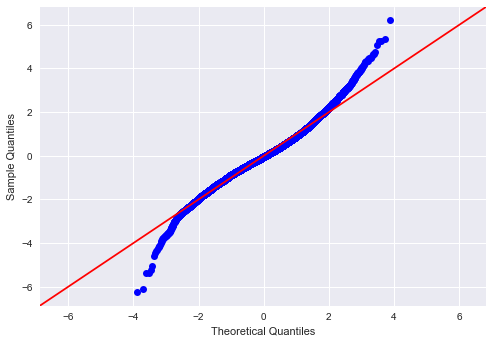

In [46]:

import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

#violations near the tails but otherwise okay 

In [47]:
from sklearn.model_selection import train_test_split
y = df_preprocessed[['price']]
X = df_preprocessed.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [49]:
#Look at the residuals and calculate the MSE for training and test sets:  
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error
from math import sqrt
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
rms = sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('RMS:', rms )

Train Mean Squarred Error: 0.190487293428229
Test Mean Squarred Error: 0.18759088784594197
RMS: 0.4331176374219156


In [50]:
#cross-validation
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()


0.1938885746316464

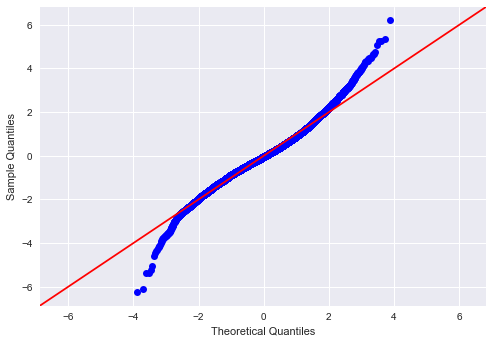

In [51]:
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

#violations near the tails but otherwise okay 

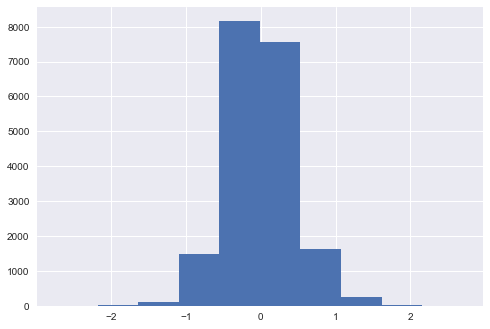

In [52]:

ax = plt.hist(model.resid)


In [53]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_hat_test)*100
print(mape)


32.65189447171212


### Most Important Variables
I check correlation to identify the variables that have the largest effect on price. Square foot of livng area, grade, and bathroom are 3 highly correlateted variables.  

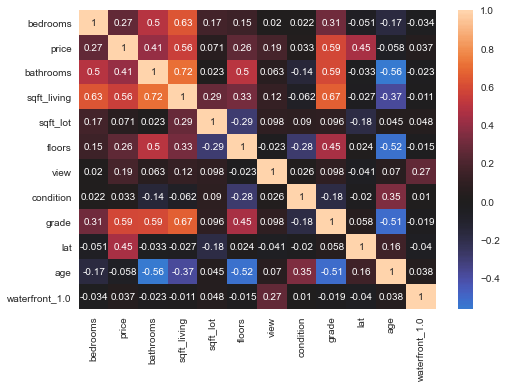

In [54]:
feats2 = ['bedrooms', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
        'condition', 'grade', 'lat', 'age', 'waterfront_1.0']
corr = df_preprocessed[feats2].corr()
sns.heatmap(corr, center=0, annot=True);

# high correlation between price and sqft_living, grade, and latitude, bathrooms

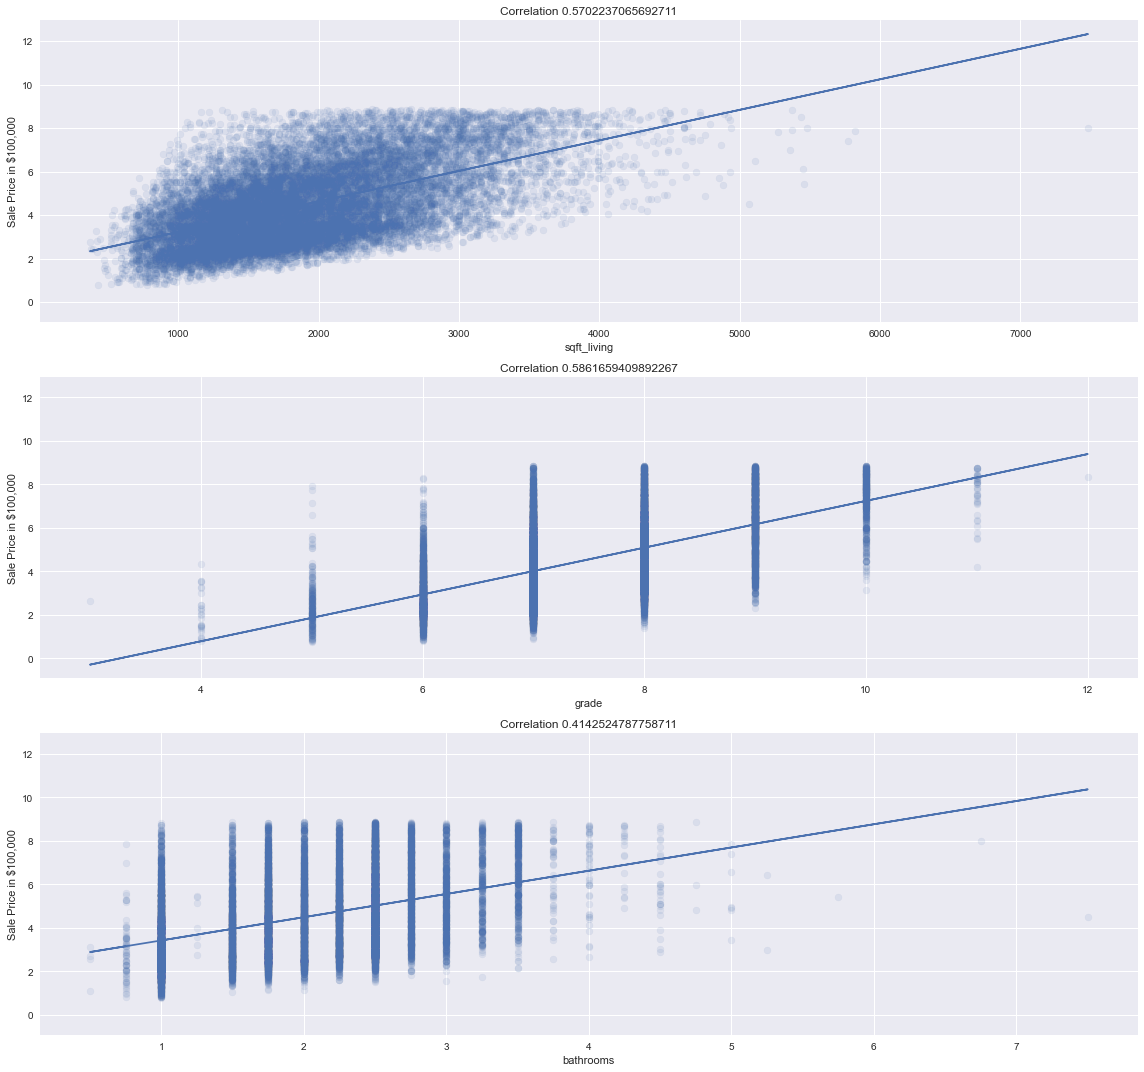

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,15), sharey=True)

highcorr = ['sqft_living', 'grade', 'bathrooms']
for ax, column in zip(axes.flatten(), df[highcorr].columns):
    ax.scatter(df2[column], df2['price'] / 100_000, label=column, alpha=.1)
    m, b = np.polyfit(df2[column], df2['price']/100_000, 1)
    ax.plot(df2[column], m*df2[column]+b)
    coef = np.corrcoef(df2[column], df2['price'])[0,1]
    ax.set_title(f'Correlation {coef}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout() 

### Alternative Model

I remove the top outliers to see how that affects the model. However, the r2 and condition number become worse, and other measures don't improve significantly. 

In [56]:

##removing outliers due to the errors 
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df_preprocessed['price'].quantile(q=q)))

0.9 percentile: 1.5040793080680324
0.91 percentile: 1.5707891958225912
0.92 percentile: 1.655232091714435
0.93 percentile: 1.7298120573661175
0.94 percentile: 1.812819424027793
0.95 percentile: 1.8944869634079926
0.96 percentile: 1.9761150961034417
0.97 percentile: 2.092077710268513
0.98 percentile: 2.190037099029446


In [57]:
subset = df_preprocessed[df_preprocessed['price'] < 2.0]
print('Percent removed:',(len(df_preprocessed) - len(subset))/len(df_preprocessed))

##got to change eit so it's subset insteaed of df_preprocessed 

Percent removed: 0.03788665144280673


In [58]:
X200 = subset.drop(['price'], axis=1)
X_fin200 = X200[result2]
X_with_intercept200 = sm.add_constant(X_fin200)
model200 = sm.OLS(subset['price'], X_with_intercept200).fit()
model200.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1019.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:58:10   Log-Likelihood:                -9797.9
No. Observations:               18538   AIC:                         1.974e+04
Df Residuals:                   18465   BIC:                         2.031e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6313      0.020    -32.122      0.000      -0.670      -0.593
bedrooms          -0.0288      0.004     -6.958      0.000      -0.037      -0.021
bathrooms          0.0412      0.005      7.858      0.000       0.031       0.052
sqft_living        0.3369      0.006     55.880      0.000       0.325       0.349
sqft_lot           0.1365      0.005     30.065      0.000       0.128       0.145
floors             0.0356      0.004      8.325      0.000       0.027       0.044
view               0.0867      0.003     25.328      0.000       0.080       0.093
condition          0.0622      0.003     18.370      0.000       0.056       0.069
grade              0.2417      0.005     48.775      0.000       0.232       0.251
lat                0.1867      0.014     13.211      0.000       0.159       0.214
long              -0.0474      0.014     -3.437      0.001      -0.074      -0.020
age                0.0600      0.005     11.393      0.000       0.050       0.070
zipcode_98002      0.0648      0.032      2.050      0.040       0.003       0.127
zipcode_98004      2.0587      0.056     36.887      0.000       1.949       2.168
zipcode_98005      1.4048      0.049     28.475      0.000       1.308       1.501
zipcode_98006      1.0973      0.034     32.304      0.000       1.031       1.164
zipcode_98007      1.0170      0.047     21.543      0.000       0.924       1.110
zipcode_98008      1.0136      0.039     25.822      0.000       0.937       1.090
zipcode_98010      0.5801      0.049     11.881      0.000       0.484       0.676
zipcode_98011      0.3359      0.049      6.846      0.000       0.240       0.432
zipcode_98014      0.2607      0.065      4.016      0.000       0.133       0.388
zipcode_98019      0.1430      0.058      2.479      0.013       0.030       0.256
zipcode_98022      0.2497      0.040      6.306      0.000       0.172       0.327
zipcode_98023     -0.1084      0.025     -4.390      0.000      -0.157      -0.060
zipcode_98024      0.5862      0.065      9.044      0.000       0.459       0.713
zipcode_98027      0.8886      0.035     25.268      0.000       0.820       0.957
zipcode_98028      0.2220      0.045      4.906      0.000       0.133       0.311
zipcode_98029      1.1228      0.041     27.384      0.000       1.042       1.203
zipcode_98032     -0.1368      0.038     -3.585      0.000      -0.212      -0.062
zipcode_98033      1.1679      0.041     28.702      0.000       1.088       1.248
zipcode_98034      0.4953      0.040     12.412      0.000       0.417       0.573
zipcode_98038      0.3022      0.028     10.689      0.000       0.247       0.358
zipcode_98039      2.7189      0.412      6.597      0.000       1.911       3.527
zipcode_98040      1.8168      0.054     33.376      0.000       1.710       1.923
zipcode_9804

In [59]:
y200 = subset[['price']]
X200 = subset.drop(['price'], axis=1)
X_train200, X_test200, y_train200, y_test200 = train_test_split(X200, y200, test_size=0.2, random_state=42)


In [60]:
linreg200 = LinearRegression()
linreg200.fit(X_train200, y_train200)


LinearRegression()

In [61]:
y_hat_train200 = linreg200.predict(X_train200)
y_hat_test200 = linreg200.predict(X_test200)
train_residuals200 = y_hat_train200 - y_train200
test_residuals200 = y_hat_test200 - y_test200



In [62]:
train_mse200 = mean_squared_error(y_train200, y_hat_train200)
test_mse200 = mean_squared_error(y_test200, y_hat_test200)
rms200 = sqrt(mean_squared_error(y_test200, y_hat_test200))

print('Train Mean Squarred Error:', train_mse200)
print('Test Mean Squarred Error:', test_mse200)
print('RMS:', rms200 )

mape200 = mean_absolute_error(y_test200, y_hat_test200)*100
print(mape200)



Train Mean Squarred Error: 0.1677639640384917
Test Mean Squarred Error: 0.17176332945357994
RMS: 0.41444339716489625
31.05623790314396


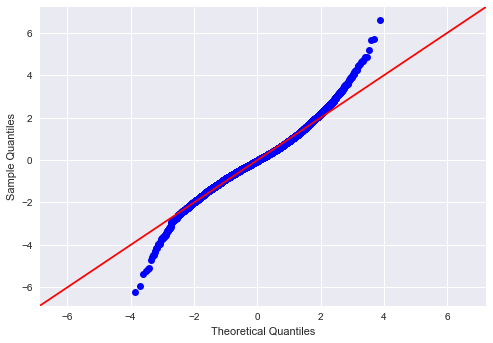

In [63]:
fig = sm.graphics.qqplot(model200.resid, dist=stats.norm, line='45', fit=True)


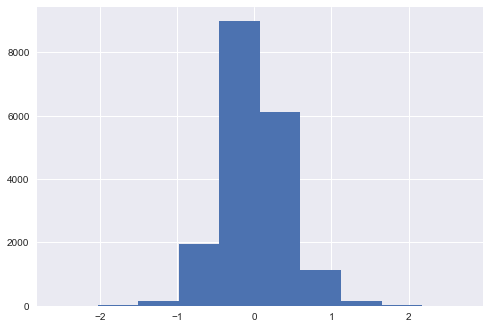

In [64]:
ax = plt.hist(model200.resid)


## Conclusions
I chose the first model above as my model, rather than the refined version (model200) that was formed from removing outliers.  I made this decision because the r2 value was higher in the top model, and the mean of the residuals was closer to 0.  R2 describes how strong the relationship is between my model and the dependent variables. This model has a R2 value of .809, showing good fit. 

The mean of the residuals graph is centered around 0, showing that the model does not have systematic bias. 

The Train and Test mean squared errors are 0.19 and 0.188, which is good as they do not show a big difference between each other.  

This model struggles with very high and very low values, meaning it should not be used to estimate sales price for those homes.  

Square foot of living area, grade, and bathrooms are 3 variables highly correlateted with price. This means that real estate agents could focus on this when pricing houses.  They could also recommend potential sellers to add a bathroom onto the house or improve the grade by improving construction/design. 




## Appendix: Another Rejected Model

In [65]:
X12 = df_preprocessed.drop(['price'], axis=1)
X_fin12 = X12[selected_columns]
X_with_intercept12 = sm.add_constant(X_fin12)
model12 = sm.OLS(df_preprocessed['price'], X_with_intercept12).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1052.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:58:11   Log-Likelihood:                -16171.
No. Observations:               19268   AIC:                         3.242e+04
Df Residuals:                   19227   BIC:                         3.275e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5328      0.006    -94.080      0.000      -0.544      -0.522
sqft_living        0.5584      0.004    130.416      0.000       0.550       0.567
zipcode_98004      2.2240      0.058     38.072      0.000       2.110       2.339
zipcode_98005      1.5542      0.052     30.148      0.000       1.453       1.655
zipcode_98006      1.2212      0.032     38.346      0.000       1.159       1.284
zipcode_98007      1.0428      0.051     20.494      0.000       0.943       1.143
zipcode_98008      0.9899      0.036     27.884      0.000       0.920       1.060
zipcode_98010      0.2231      0.057      3.899      0.000       0.111       0.335
zipcode_98024      0.5762      0.068      8.506      0.000       0.443       0.709
zipcode_98027      0.8101      0.030     27.305      0.000       0.752       0.868
zipcode_98029      0.9975      0.033     30.263      0.000       0.933       1.062
zipcode_98033      1.3453      0.032     41.849      0.000       1.282       1.408
zipcode_98039      3.0553      0.324      9.437      0.000       2.421       3.690
zipcode_98040      1.9877      0.057     35.080      0.000       1.877       2.099
zipcode_98045      0.2814      0.039      7.212      0.000       0.205       0.358
zipcode_98052      1.1317      0.025     44.764      0.000       1.082       1.181
zipcode_98053      1.0568      0.031     34.073      0.000       0.996       1.118
zipcode_98065      0.4387      0.033     13.159      0.000       0.373       0.504
zipcode_98070      0.4928      0.055      8.955      0.000       0.385       0.601
zipcode_98074      1.0665      0.029     36.169      0.000       1.009       1.124
zipcode_98075      1.2749      0.034     37.105      0.000       1.208       1.342
zipcode_98077      0.9548      0.044     21.691      0.000       0.869       1.041
zipcode_98102      1.7296      0.067     25.710      0.000       1.598       1.862
zipcode_98103      1.3484      0.024     55.172      0.000       1.301       1.396
zipcode_98105      1.5823      0.046     34.738      0.000       1.493       1.672
zipcode_98107      1.3873      0.036     38.858      0.000       1.317       1.457
zipcode_98109      1.8195      0.066     27.429      0.000       1.690       1.950
zipcode_98112      1.7597      0.050     35.412      0.000       1.662       1.857
zipcode_98115      1.3026      0.025     51.385      0.000       1.253       1.352
zipcode_98116      1.2536      0.033     37.560      0.000       1.188       1.319
zipcode_98117      1.2909      0.026     50.506      0.000       1.241       1.341
zipcode_98118      0.4467      0.026     17.071      0.000       0.395       0.498
zipcode_98119      1.8023      0.049     36.539      0.000       1.706       1.899
zipcode_98122      1.2967      0.036     36.291      0.000       1.227       1.367
zipcode_9812

In [66]:
df_preprocessed3=df2.drop(["id"], axis=1)
df_preprocessed3=df2.drop(["date"], axis=1)

In [67]:
##Model 3 --- turn grade and condition into categories

#create dummy variables for the categorical features
categoricals3 = ['zipcode', 'grade', 'condition', 'waterfront']
zipcode_dummies = pd.get_dummies(df2['zipcode'], prefix = 'zipcode', drop_first=True)
grade_dummies = pd.get_dummies(df2['grade'], prefix = 'grade', drop_first=True)
condition_dummies = pd.get_dummies(df2['condition'], prefix = 'condition', drop_first=True)
waterfront_dummies = pd.get_dummies(df2['waterfront'], prefix = 'waterfront', drop_first=True)


df_preprocessed3 = df2.drop(categoricals3, axis=1)

df_preprocessed3 = pd.concat([df_preprocessed3, zipcode_dummies, grade_dummies, condition_dummies, waterfront_dummies], axis=1)
df_preprocessed3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,...,grade_8,grade_9,grade_10,grade_11,grade_12,condition_2,condition_3,condition_4,condition_5,waterfront_1.0
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0,0,0,0,0,0,0,0,1,0
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,1,0,0,0,0,0,1,0,0,0


In [68]:
predictors3 = df_preprocessed3.drop('price', axis=1)
predictors3_int = sm.add_constant(predictors3)
model3 = sm.OLS(df_preprocessed3['price'],predictors3_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     938.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:58:12   Log-Likelihood:            -2.4339e+05
No. Observations:               19268   AIC:                         4.870e+05
Df Residuals:                   19170   BIC:                         4.877e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.364e+07   3.78e+06    -14.178      0.000   -6.11e+07   -4.62e+07
id              1.773e-08   1.94e-07      0.091      0.927   -3.63e-07    3.98e-07
date             1.29e+04    770.363     16.752      0.000    1.14e+04    1.44e+04
bedrooms       -2420.6316    829.666     -2.918      0.004   -4046.851    -794.413
bathrooms       1.391e+04   1349.034     10.310      0.000    1.13e+04    1.66e+04
sqft_living       59.9859      1.934     31.015      0.000      56.195      63.777
sqft_lot           0.2647      0.020     13.339      0.000       0.226       0.304
floors          -1.45e+04   1598.013     -9.074      0.000   -1.76e+04   -1.14e+04
view            2.462e+04   1020.790     24.116      0.000    2.26e+04    2.66e+04
sqft_above        38.6864      1.975     19.589      0.000      34.815      42.557
yr_built        6224.4661    385.609     16.142      0.000    5468.639    6980.294
lat             1.821e+05    3.1e+04      5.880      0.000    1.21e+05    2.43e+05
long           -5.282e+04   2.19e+04     -2.408      0.016   -9.58e+04   -9831.305
sqft_living15     33.5707      1.596     21.032      0.000      30.442      36.699
sqft_lot15         0.0608      0.031      1.954      0.051      -0.000       0.122
age             6680.3146    385.410     17.333      0.000    5924.878    7435.752
zipcode_98002   5071.9478   6735.896      0.753      0.451   -8131.000    1.83e+04
zipcode_98003  -6839.6775   6030.186     -1.134      0.257   -1.87e+04    4980.015
zipcode_98004   3.988e+05    1.3e+04     30.755      0.000    3.73e+05    4.24e+05
zipcode_98005   2.663e+05   1.24e+04     21.495      0.000    2.42e+05    2.91e+05
zipcode_98006   2.127e+05   1.02e+04     20.949      0.000    1.93e+05    2.33e+05
zipcode_98007    1.95e+05   1.26e+04     15.501      0.000     1.7e+05     2.2e+05
zipcode_98008   1.893e+05   1.19e+04     15.865      0.000    1.66e+05    2.13e+05
zipcode_98010   9.374e+04   1.04e+04      8.996      0.000    7.33e+04    1.14e+05
zipcode_98011   6.896e+04   1.55e+04      4.454      0.000    3.86e+04    9.93e+04
zipcode_98014   6.093e+04    1.7e+04      3.591      0.000    2.77e+04    9.42e+04
zipcode_98019   3.822e+04   1.67e+04      2.284      0.022    5423.649     7.1e+04
zipcode_98022   3.018e+04   9103.860      3.315      0.001    1.23e+04     4.8e+04
zipcode_98023  -2.528e+04   5570.872     -4.538      0.000   -3.62e+04   -1.44e+04
zipcode_98024   1.131e+05   1.51e+04      7.504      0.000    8.35e+04    1.43e+05
zipcode_98027   1.632e+05   1.01e+04     16.142      0.000    1.43e+05    1.83e+05
zipcode_98028   5.431e+04   1.51e+04      3.602      0.000    2.48e+04    8.39e+04
zipcode_98029   1.969e+05   1.16e+04     16.983      0.000    1.74e+05     2.2e+05
zipcode_98030  -2893.0315   6650.927     -0.435      0.664   -1.59e+04    1.01e+04
zipcode_9803

In [69]:
model3.pvalues

const             2.114582e-45
id                9.272454e-01
date              1.536309e-62
bedrooms          3.531504e-03
bathrooms         7.393525e-25
                      ...     
condition_2       1.352221e-04
condition_3       3.101406e-12
condition_4       1.494689e-16
condition_5       1.426920e-24
waterfront_1.0    1.016345e-32
Length: 99, dtype: float64

In [70]:
result3 = []
for column in predictors3_int:
    if model3.pvalues[column]<0.05:
        result3.append(column)
result3.remove('const')
    

In [71]:
#Build the final model again in Statsmodel
X3 = df_preprocessed3.drop(['price'], axis=1)
X_fin3 = X3[result3]
X_with_intercept3 = sm.add_constant(X_fin3)
model35 = sm.OLS(df_preprocessed3['price'], X_with_intercept3).fit()
model35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1087.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:58:13   Log-Likelihood:            -2.4427e+05
No. Observations:               19268   AIC:                         4.887e+05
Df Residuals:                   19192   BIC:                         4.893e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.659e+07   3.14e+06    -17.994      0.000   -6.28e+07   -5.04e+07
date            1.264e+04    805.387     15.699      0.000    1.11e+04    1.42e+04
bedrooms       -7273.8625    850.132     -8.556      0.000   -8940.196   -5607.529
bathrooms       1.583e+04   1398.836     11.319      0.000    1.31e+04    1.86e+04
sqft_living       72.8367      1.993     36.550      0.000      68.931      76.743
sqft_lot           0.2988      0.016     18.783      0.000       0.268       0.330
floors         -1.229e+04   1655.828     -7.422      0.000   -1.55e+04   -9043.337
view            2.746e+04   1059.198     25.928      0.000    2.54e+04    2.95e+04
sqft_above        53.2212      2.017     26.389      0.000      49.268      57.174
yr_built        6272.4326    403.125     15.560      0.000    5482.273    7062.592
lat             2.406e+05   1.73e+04     13.879      0.000    2.07e+05    2.75e+05
long           -5.669e+04   1.52e+04     -3.732      0.000   -8.65e+04   -2.69e+04
sqft_living15     50.1714      1.605     31.250      0.000      47.024      53.318
age             6373.0961    402.940     15.817      0.000    5583.299    7162.893
zipcode_98004   3.939e+05   9157.294     43.014      0.000    3.76e+05    4.12e+05
zipcode_98005    2.71e+05   8336.229     32.509      0.000    2.55e+05    2.87e+05
zipcode_98006   2.202e+05   5742.409     38.349      0.000    2.09e+05    2.31e+05
zipcode_98007   1.963e+05   8342.760     23.534      0.000     1.8e+05    2.13e+05
zipcode_98008   1.852e+05   6801.752     27.228      0.000    1.72e+05    1.99e+05
zipcode_98010   9.061e+04   8684.695     10.433      0.000    7.36e+04    1.08e+05
zipcode_98011   4.706e+04   8734.372      5.388      0.000    2.99e+04    6.42e+04
zipcode_98014   3.937e+04   1.09e+04      3.606      0.000     1.8e+04    6.08e+04
zipcode_98019   5202.0212   9769.239      0.532      0.594   -1.39e+04    2.44e+04
zipcode_98022   3.611e+04   6807.136      5.305      0.000    2.28e+04    4.95e+04
zipcode_98023    -1.7e+04   4584.098     -3.710      0.000    -2.6e+04   -8019.657
zipcode_98024   1.014e+05   1.12e+04      9.017      0.000    7.94e+04    1.23e+05
zipcode_98027   1.614e+05   5773.654     27.953      0.000     1.5e+05    1.73e+05
zipcode_98028   3.296e+04   8076.390      4.080      0.000    1.71e+04    4.88e+04
zipcode_98029   2.019e+05   6752.432     29.902      0.000    1.89e+05    2.15e+05
zipcode_98032  -1.478e+04   7193.449     -2.054      0.040   -2.89e+04    -677.960
zipcode_98033   2.182e+05   7045.970     30.968      0.000    2.04e+05    2.32e+05
zipcode_98034   9.061e+04   6991.590     12.960      0.000    7.69e+04    1.04e+05
zipcode_98038   3.124e+04   4513.622      6.921      0.000    2.24e+04    4.01e+04
zipcode_98039   5.399e+05   4.51e+04     11.972      0.000    4.52e+05    6.28e+05
zipcode_9804

In [72]:
y3 = df_preprocessed3[['price']]
X3 = df_preprocessed3.drop(['price'], axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [73]:
linreg3 = LinearRegression()
linreg3.fit(X_train3, y_train3)

y_hat_train3 = linreg3.predict(X_train3)
y_hat_test3 = linreg3.predict(X_test3)

In [74]:
train_residuals3 = y_hat_train3 - y_train3
test_residuals3 = y_hat_test3 - y_test3

train_mse3 = mean_squared_error(y_train3, y_hat_train3)
test_mse3 = mean_squared_error(y_test3, y_hat_test3)
print('Train Mean Squarred Error:', train_mse3)
print('Test Mean Squarred Error:', test_mse3)

Train Mean Squarred Error: 5499732438.68763
Test Mean Squarred Error: 5484958692.55082


In [75]:
#cross-validation


mse3 = make_scorer(mean_squared_error)

cv_10_results = cross_val_score(linreg3, X3, y3, cv=10, scoring=mse)
cv_10_results.mean()

5591587834.660242